# image Classification 

## Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Overview on the dataset

In [22]:
print(f"Number of artists selected: {len(os.listdir('./selected_artist'))}")
print("The artist are :")
print(os.listdir('./selected_artist'))

Number of artists selected: 8
The artist are :
['Francisco_Goya', 'Alfred_Sisley', 'Rene_Magritte', 'Titian', 'Paul_Klee', 'Paul_Gauguin', 'Marc_Chagall', 'Rembrandt']


In [23]:
artist_arts_len = {artist : len(os.listdir(f'./selected_artist/{artist}')) for artist in os.listdir('./selected_artist')}

In [62]:
artist_arts_len

{'Francisco_Goya': 291,
 'Alfred_Sisley': 260,
 'Rene_Magritte': 194,
 'Titian': 256,
 'Paul_Klee': 188,
 'Paul_Gauguin': 311,
 'Marc_Chagall': 239,
 'Rembrandt': 262}

In [79]:
import re

regex = re.compile(r'(?P<Artist>[A-Za-z\_]+)\_(?P<Number>\d+)\.(?P<Format>[jpeg]+)')
matched = {}
for artist in os.listdir('./selected_artist'):
    matched[artist] = pd.DataFrame(re.findall(regex, '\n'.join(os.listdir(f'./selected_artist/{artist}'))))
    print(f"{artist} the name are coherent : {all(matched[artist][0])}")
    print(f"{artist} his/her art indice are valid : {all((pd.to_numeric(matched[artist][1]) < artist_arts_len[artist]) & (pd.to_numeric(matched[artist][1]) > 0))}")
    print(f"All art of {artist} are .jpg : {all(matched[artist][2] == 'jpg')}\n")


Francisco_Goya the name are coherent : True
Francisco_Goya's art indice are valid : False
All art of Francisco_Goya are .jpg : True

Alfred_Sisley the name are coherent : True
Alfred_Sisley's art indice are valid : True
All art of Alfred_Sisley are .jpg : True

Rene_Magritte the name are coherent : True
Rene_Magritte's art indice are valid : False
All art of Rene_Magritte are .jpg : True

Titian the name are coherent : True
Titian's art indice are valid : True
All art of Titian are .jpg : True

Paul_Klee the name are coherent : True
Paul_Klee's art indice are valid : False
All art of Paul_Klee are .jpg : True

Paul_Gauguin the name are coherent : True
Paul_Gauguin's art indice are valid : False
All art of Paul_Gauguin are .jpg : True

Marc_Chagall the name are coherent : True
Marc_Chagall's art indice are valid : False
All art of Marc_Chagall are .jpg : True

Rembrandt the name are coherent : True
Rembrandt's art indice are valid : False
All art of Rembrandt are .jpg : True



In [25]:
def get_art(artist, index):
    if artist not in os.listdir('./selected_artist'):
        print("Not in our context.")
        return -1
    if index < 0 or index > artist_arts_len[artist]:
        print("Invalid index")
        return -1
    return cv2.imread(f'./selected_artist/{artist}/{artist}_{index}.jpg')

In [87]:
def show_img_jupyter(path):
    img = cv2.imread(path)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [100]:
path = './selected_artist/Titian/Titian_99.jpg'
cv2.imread(path)

array([[[13, 13, 25],
        [ 4,  4, 16],
        [ 0,  0,  9],
        ...,
        [ 9, 22, 38],
        [ 8, 21, 37],
        [ 7, 20, 36]],

       [[14, 14, 26],
        [ 5,  5, 17],
        [ 0,  0, 11],
        ...,
        [ 9, 22, 38],
        [ 7, 20, 36],
        [ 6, 19, 35]],

       [[13, 13, 25],
        [ 6,  6, 18],
        [ 0,  0, 12],
        ...,
        [ 7, 22, 38],
        [ 5, 20, 36],
        [ 4, 19, 35]],

       ...,

       [[ 2,  5, 13],
        [ 2,  8, 13],
        [ 6,  9, 17],
        ...,
        [ 5,  4, 13],
        [ 3,  6, 11],
        [ 5,  5, 11]],

       [[ 6,  9, 14],
        [ 5, 10, 13],
        [ 6,  9, 14],
        ...,
        [ 8,  6, 12],
        [ 6,  7, 11],
        [ 8,  7, 11]],

       [[15, 18, 22],
        [14, 17, 21],
        [12, 15, 19],
        ...,
        [17, 16, 20],
        [18, 17, 21],
        [19, 18, 22]]], dtype=uint8)

In [91]:
def resizing_square(path, dim):
    origin_img = cv2.imread(path)
    return cv2.resize(origin_img, (dim, dim))

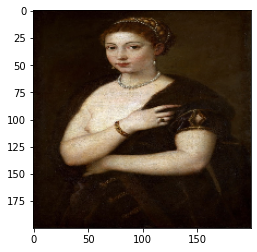

In [92]:
show_img_jupyter(resizing_square(path, 200))

In [101]:
resizing_square(path, 200)

array([[[ 5,  5, 17],
        [ 2,  2, 14],
        [ 0,  0, 12],
        ...,
        [ 5, 16, 33],
        [ 9, 22, 38],
        [ 5, 20, 36]],

       [[ 7,  7, 19],
        [ 1,  1, 13],
        [ 4,  4, 17],
        ...,
        [ 8, 23, 39],
        [ 7, 23, 39],
        [ 8, 23, 39]],

       [[ 2,  2, 14],
        [ 1,  1, 13],
        [ 3,  3, 15],
        ...,
        [ 9, 24, 40],
        [ 6, 22, 37],
        [ 9, 25, 38]],

       ...,

       [[ 5,  7, 17],
        [ 2,  4, 14],
        [ 2,  3, 13],
        ...,
        [ 3,  5, 15],
        [ 1,  3, 14],
        [ 4,  5, 15]],

       [[ 1,  8, 22],
        [ 4, 12, 25],
        [ 2,  8, 21],
        ...,
        [ 2,  5, 18],
        [ 4,  7, 19],
        [ 2,  5, 16]],

       [[ 3,  8, 14],
        [ 5,  9, 15],
        [ 6,  8, 16],
        ...,
        [14, 14, 20],
        [ 1,  1,  9],
        [ 3,  5, 11]]], dtype=uint8)